# Preámbulo

In [1]:
# Módulo de economía ambiental #
import EcoAmb as EA 

# Gráficos y estilo #
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
from mpl_toolkits.mplot3d import Axes3D # perspectiva 3d
from matplotlib import cm # mapas de colores
plt.style.use('seaborn-whitegrid') # estilo de gráficos

# Módulo de arreglos y vectores
import numpy as np

# Gráficos interactivos  #
from ipywidgets import interact, fixed # Para hacer gráficos interactivos

# Ignorar advertencias 
import warnings
warnings.filterwarnings("ignore")

# Recargar módulo automáticamente
%load_ext autoreload
%autoreload 2

# Preferencias

## Preferencias fuertemente convexas

Función Cobb-Douglas
$u(x,y) = x^{\alpha}y^{1-\alpha}$

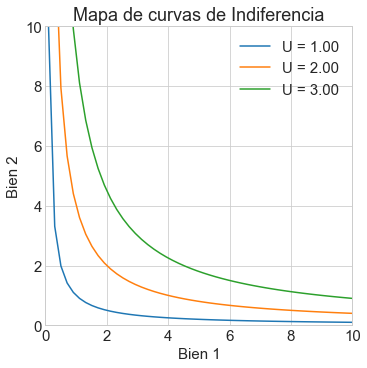

In [3]:
import EcoAmb as EA

def My_U1(x,y, r = 0.5):
    return x**r *y**(1-r)

C1 = EA.Consumer(My_U1)
#C1.PlotDemanda(p2 = 3, I =7, r1 = 0.9)
C1.Indiff_Map_Plot(np.array([1,2,3]))

#C1.Indiff_Map_Plot(np.array([3]))
#C1.TMGS(c1 = 9, u = 3)


$dy/dx$ = -Umg_x/Umg_y

si aumento en $dx$ el consumo de $x$, ¿cuánto disminuyo $y$ para quedar en el mismo nivel de utilidad?

$dy/dx = -10 $

Función de utilidad cuasi-lineal

$u(x,y) = x^r+ y$

con  $r \in [0,1[$

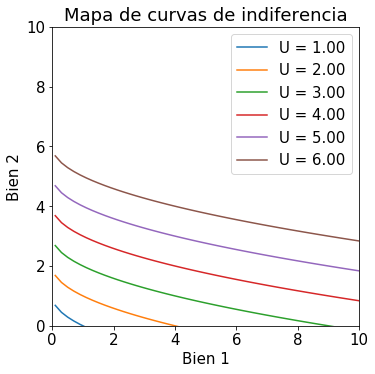

In [6]:
import EcoAmb as EA
def My_U2(x,y, r = 0.5):
    return y + x**r

C2 = EA.Consumer(My_U2)
C2.Indiff_Map_Plot(np.array([1,2,3,4,5,6]))
#C2.PlotDemanda( p2 = 4.5, I = 7)

## Preferencias cónvexas

Utilidad lineal

$u(x,y) = x + y$

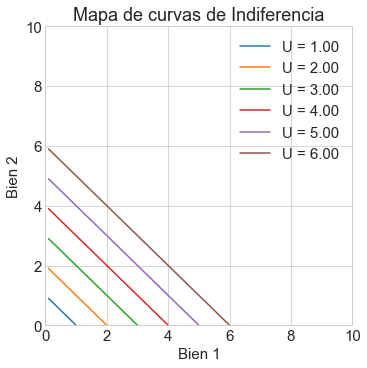

In [5]:
def My_U3(x,y):
    return x+y

C3 = EA.Consumer(My_U3)
C3.Indiff_Map_Plot(np.array([1,2,3,4,5,6]))
#C3.PlotDemanda( p2 = 4.5, I = 7)

## Preferencias no convexas

$u(x,y) = x^2 + y^2$

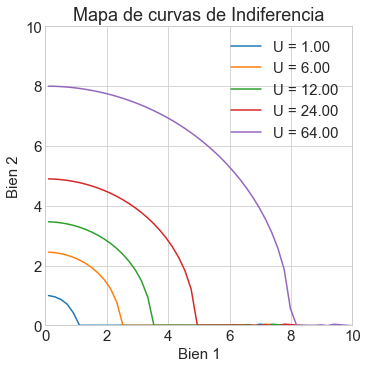

In [8]:
def My_U4(x,y):
    return x**2 + y**2

C4 = EA.Consumer(My_U4)
C4.Indiff_Map_Plot(np.array([1,6,12,24,64]))
#C4.Indiff_Map_Plot(np.array([6]))
#C4.TMGS(c1 = 2.2, u = 6)

$u(x,y) = \log(x) + y^2$

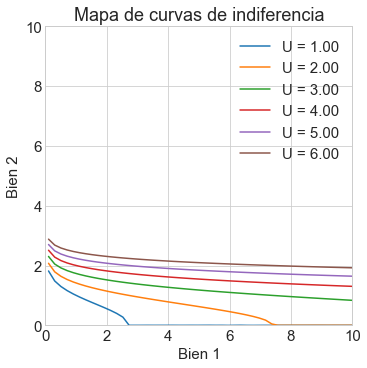

In [3]:
def My_U5(x,y):
    return np.log(x) + y**2
C5 = EA.Consumer(My_U5)
C5.Indiff_Map_Plot(np.array([1,2,3,4,5,6]))



# Demanda

## Planteamiento y gráfica

El problema que resuelve cada consumidor es

$\max_{c_1,c_2} u(x,y)$ sujeto a $p_1 c_1 + p_2 c_2 \leq I$

En este caso la función de utilidad corresponde a una Cobb-Douglas

$u(x,y) = x^{\alpha}\cdot y^{1-\alpha}$

In [3]:
import EcoAmb as EA
def My_U1(x,y, r = 0.5):
    return x**r *y**(1-r)

def My_U5(x,y):
    return np.log(x) + y**2
C1 = EA.Consumer(My_U1)
C5 = EA.Consumer(My_U5)

interact(C1.Opt_consumo_Plot,
        p1 = (1,6,0.1), p2 = (1,2,0.1), I = (1,10,0.1))

#interact(C1.Opt_consumo_Plot, p1 = fixed(1),p2 = (C1.Pmin, C1.Pmax, 1) , I = (4,10,1))


interactive(children=(FloatSlider(value=3.0, description='p1', max=6.0, min=1.0), FloatSlider(value=1.0, descr…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [9]:
interact(C1.PlotDemanda,p2=(1,3,0.1), I = (1,10,0.5))

interactive(children=(FloatSlider(value=2.0, description='p2', max=3.0, min=1.0), FloatSlider(value=5.0, descr…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [8]:
def My_U3(x,y):
    return x+y
C3 = EA.Consumer(My_U3)
#interact(C3.Opt_consumo_Plot, p1 = fixed(1),p2 = (C1.Pmin, C1.Pmax, 1) , I = (4,10,1))
interact(C3.PlotDemanda,p2=(1,3,0.1), I = (1,10,0.5))

interactive(children=(FloatSlider(value=2.0, description='p2', max=3.0, min=1.0), FloatSlider(value=5.0, descr…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [10]:
def My_U5(x,y):
    return np.log(x) + y**2
C5 = EA.Consumer(My_U5)
#C5.Indiff_Map_Plot(np.array([1,2,3,4,5,6]))
interact(C5.PlotDemanda,p2=(1,3,0.1), I = (1,10,0.5))

interactive(children=(FloatSlider(value=2.0, description='p2', max=3.0, min=1.0), FloatSlider(value=5.0, descr…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

## Resolviendo analíticamente

Recta presupuestaria:

$p_x x + p_y y = R$

$y = -(p_x/p_y) x + R/p_y$

$\mathcal{L}(x,y,\lambda) = u(x,y) + \lambda (R-p_x x -p_y y)$

* Derivamos con respecto a x e y

$\frac{\partial }{\partial x} \mathcal{L} = \frac{\partial}{\partial x} u -\lambda p_x = 0$ 

$\frac{\partial }{\partial y} \mathcal{L} = \frac{\partial}{\partial y} u -\lambda p_y = 0$ 

* Despejamos $\lambda$ en cada ecuación

$\lambda = \frac{\partial}{\partial x}( u(x,y) )/ p_x$

$\lambda = \frac{\partial}{\partial y}( u(x,y) )/ p_y$

* Igualamos

$\frac{\partial}{\partial x}( u(x,y) )/ p_x =  \frac{\partial}{\partial y}( u(x,y) )/ p_y$

$\frac{\mbox{Umg}_x}{p_x} = \frac{\mbox{Umg}_y}{p_y}$

## Un ejemplo

Encontremos la demanda de $x$ e $y$.

1. Primer paso: Encontrar $\mbox{Umg}_x$ y $\mbox{Umg}_y$

$\mbox{Umg}_x = \frac{\partial u(x,y)}{\partial x} = \alpha x^{\alpha-1}y^{1-\alpha} = \alpha (y/x)^{1-\alpha}$

$\mbox{Umg}_y = \frac{\partial u(x,y)}{\partial y} = (1- \alpha) x^{\alpha}y^{-\alpha} = (1-\alpha )(x/y)^{\alpha}$

2. Segundo paso: Reemplazamos en la condición de optimalidad $\frac{\mbox{Umg}_x}{p_x} = \frac{\mbox{Umg}_y}{p_y}$


$\frac{\mbox{Umg}_x}{\mbox{Umg}_y} = \frac{ \alpha x^{\alpha-1}y^{1-\alpha}}{(1- \alpha) x^{\alpha}y^{-\alpha}} $

$\frac{\mbox{Umg}_x}{\mbox{Umg}_y} = \frac{\alpha}{1-\alpha} (y/x)^{1-\alpha } (y/x) ^{\alpha} = \frac{\alpha}{1-\alpha} (y/x)$

$\frac{\alpha}{1-\alpha}x ^{-1} y ^{1} = \frac{\alpha}{1-\alpha}\frac{y}{x}$

3. Igualamos la TMGS al ratio de precios

$\frac{\mbox{Umg}_x}{\mbox{Umg}_y} = \frac{\alpha}{1-\alpha}\frac{y}{x} = \frac{p_x}{p_y}$

4. Despejamos una variable

$y = x (p_x/p_y)(1-\alpha)/\alpha$

5. Reemplazamos en la restricción presupuestaria $x p_x + y p_y = R$

$ R/p_y - x (p_x/p_y) = x (p_x/p_y)\frac{1-\alpha}{\alpha} $ 

6. Despejamos x

$x^* = \frac{R \alpha}{p_x }$

$y^* = \frac{R(1-\alpha)}{p_y}$

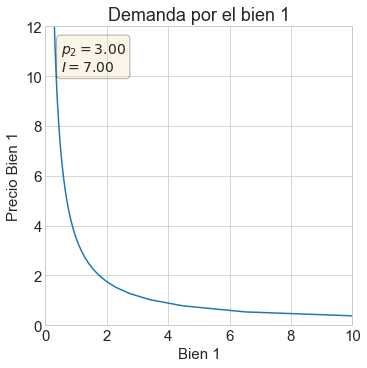

In [5]:
C1.PlotDemanda(p2 = 3, I =7)

# Pruebas varias

C:\Users\luxo_\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\luxo_\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power
C:\Users\luxo_\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\luxo_\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power
C:\Users\luxo_\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\luxo_\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power
C:\Users\luxo_\Anaconda3\lib\site-packages\

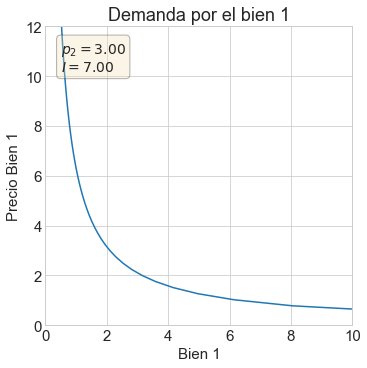

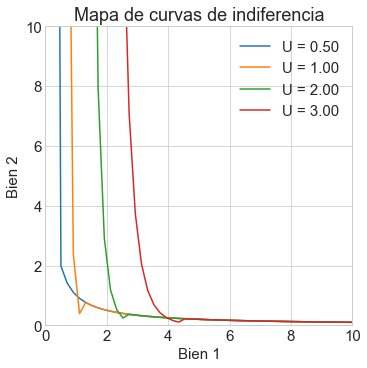

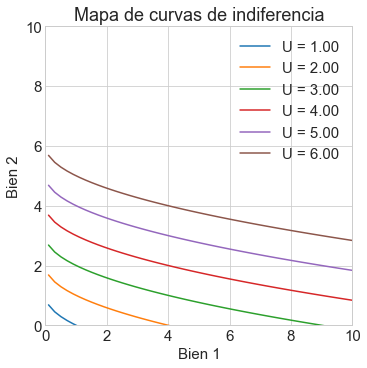

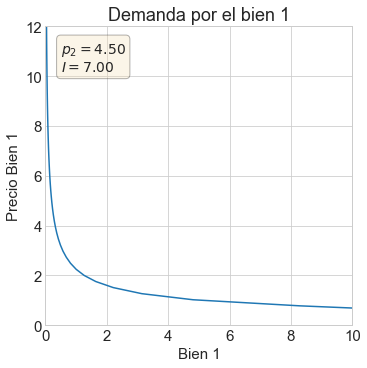

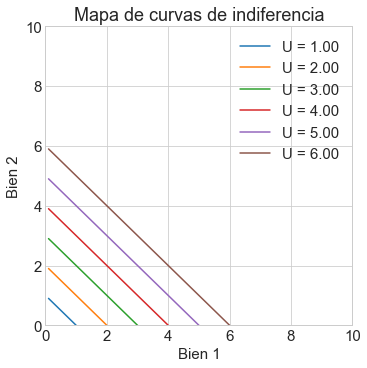

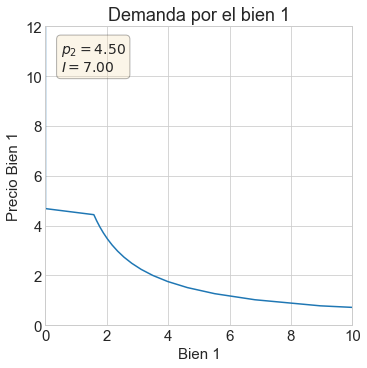

In [24]:


def My_U(x,y, r = 0.5):
    return x**r *y**(1-r)

def My_U2(x,y):
    return x+y

def My_U5(x,y):
    return np.log(x) + y**2

def My_U6(x,y, r = 0.5):
    return y + x**r

C1 = EA.Consumer(My_U)
C1.PlotDemanda(p2 = 3, I =7, r1 = 0.9)
C1.Indiff_Map_Plot(np.array([0.5,1,2,3]))

#interact(Ramon.PlotDemanda, p2 = (Ramon.Pmin, Ramon.Pmax, 1) , I = (4,10,1), r1 = (0.00,.9,0.01))

C2 = EA.Consumer(U = My_U6)

#interact(Lorca.PlotDemanda, p2 = (Pmin, Pmax, 1) , I = (4,10,1))
C2.Indiff_Map_Plot(np.array([1,2,3,4,5,6]))
C2.PlotDemanda( p2 = 4.5, I = 7)


C3 = EA.Consumer(My_U2)
C3.Indiff_Map_Plot(np.array([1,2,3,4,5,6]))
C3.PlotDemanda( p2 = 4.5, I = 7)
